<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/classifica%C3%A7%C3%A3o/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento dos dados

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

dataset = pd.read_csv("dados_ies_novas_categorias_utf8.csv", index_col=0, encoding="latin-1")

# 1.0 Mapa de correlação entre os dados

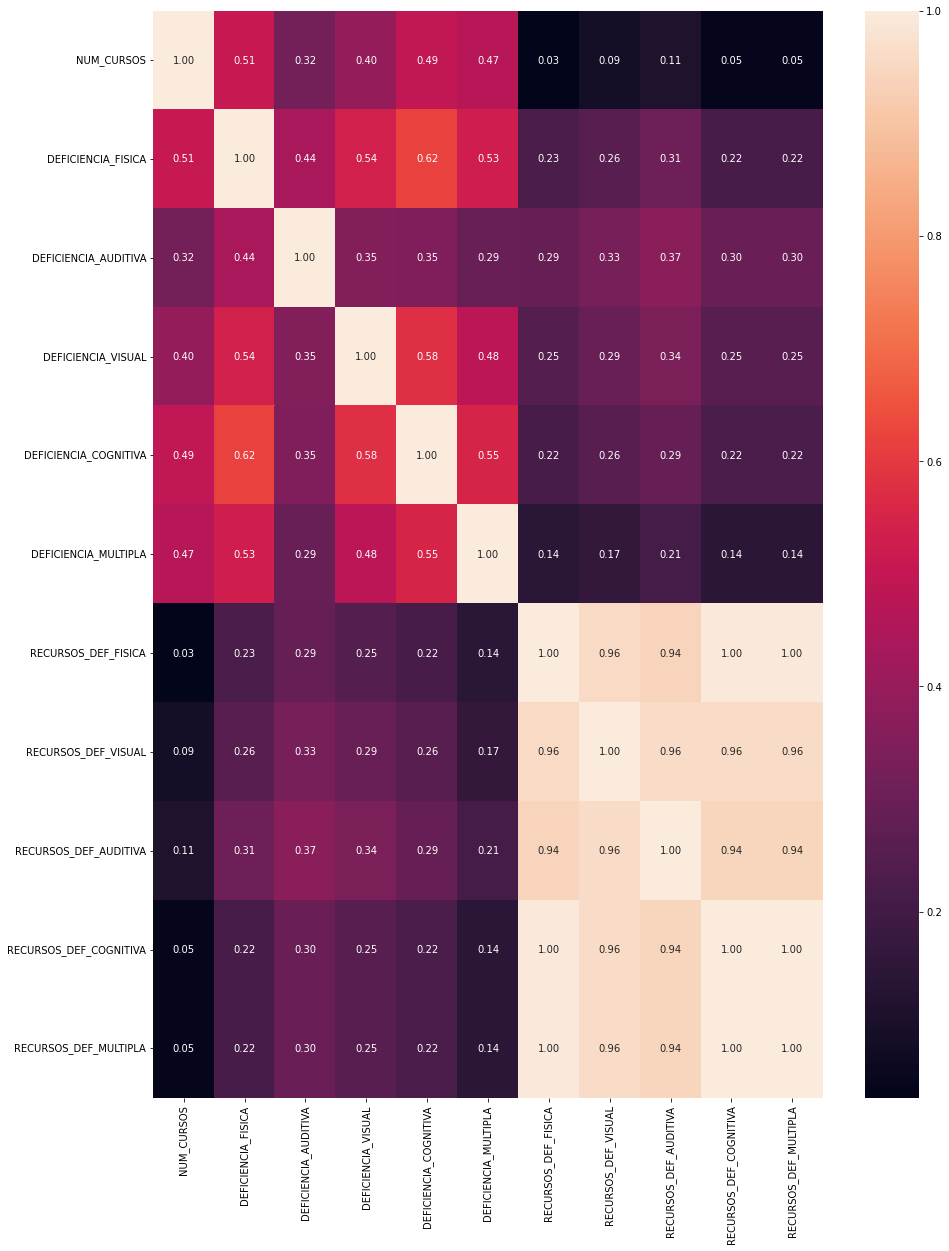

In [3]:
from pylab import rcParams

def plot_correlation(data):
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

df = dataset.drop(columns=[
                          "REGIAO", 
                          "TIPO_CATEGORIA_ADM", 
                          "UF", 
                          "CODIGO_IES"
                          ])

plot_correlation(df)

### 1.1 Visualizando os dados de Recursos X Deficiência

#### 1.1.1 Deficiência Física X Recursos para Deficiência Física

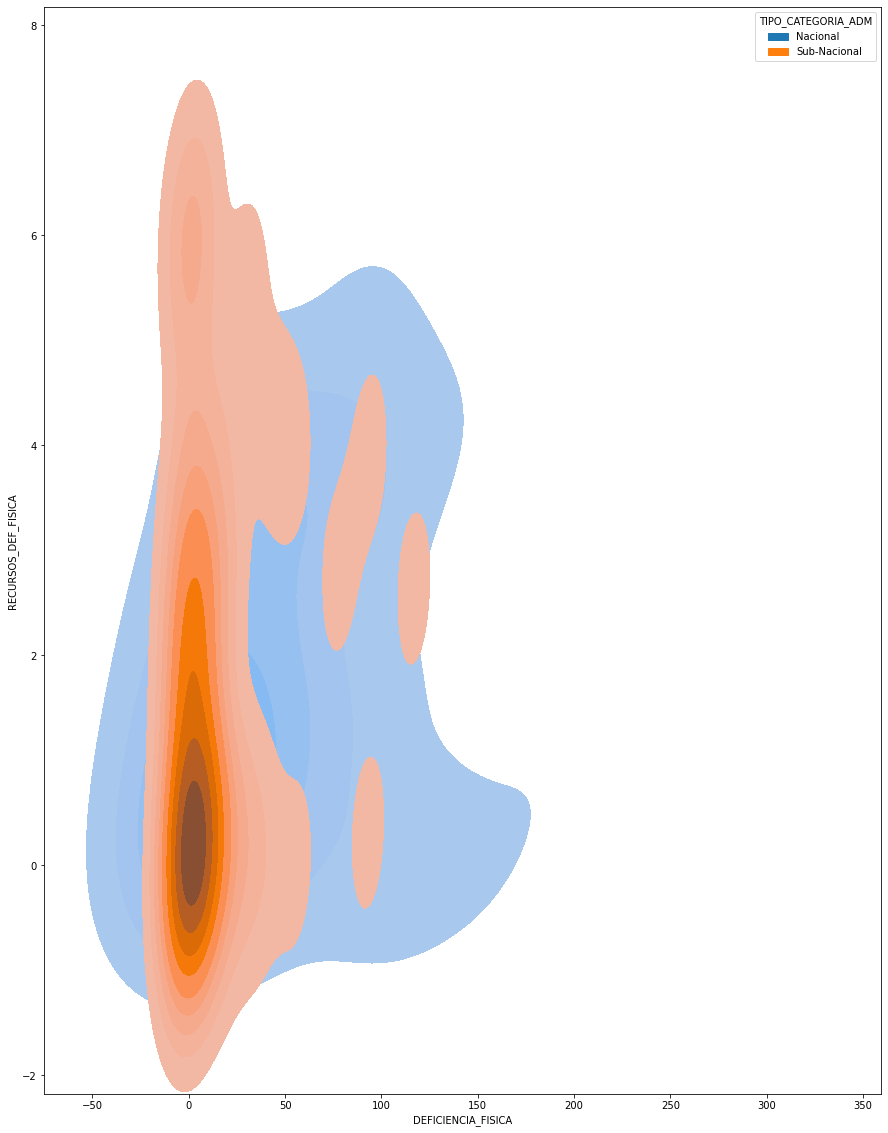

In [4]:
sns.kdeplot(
    data=dataset, 
    x="DEFICIENCIA_FISICA",
    y="RECURSOS_DEF_FISICA", 
    hue="TIPO_CATEGORIA_ADM", 
    fill=True
)

#### 1.1.2 Deficiência Visual X Recursos para Deficiência Visual

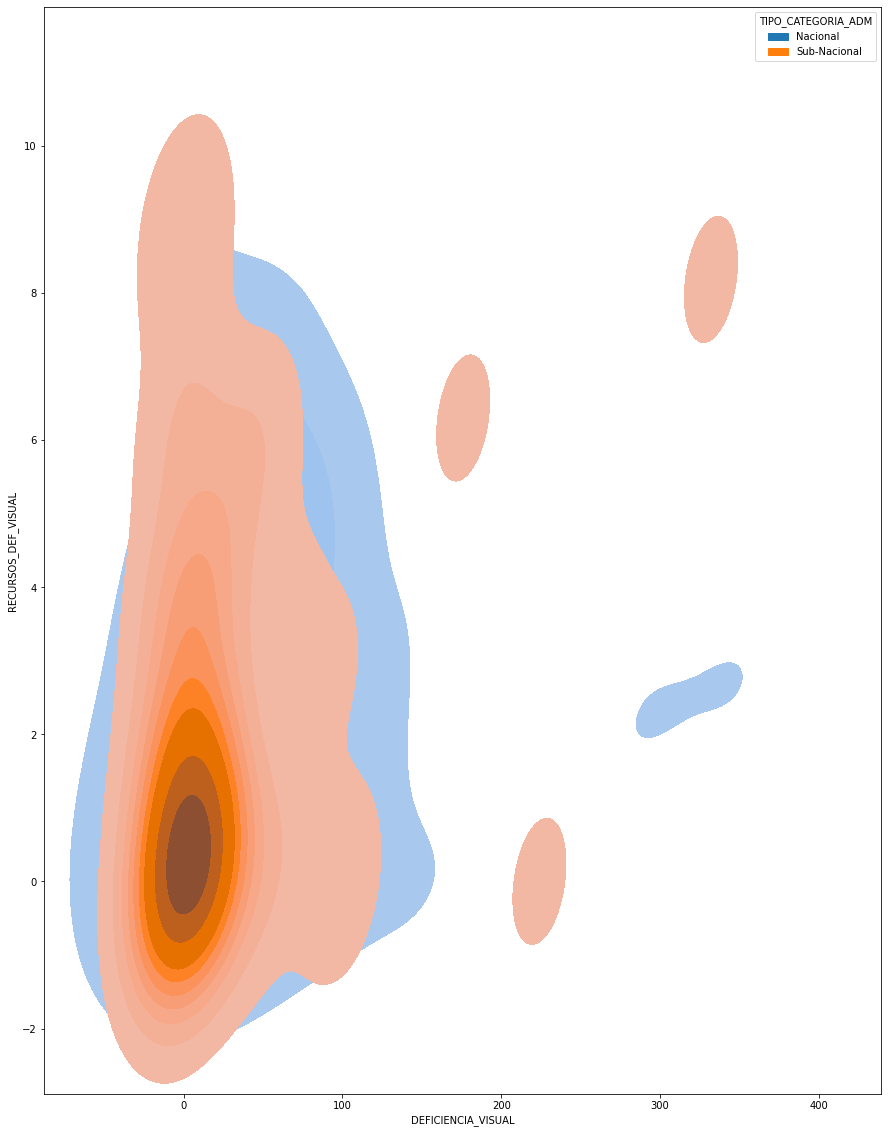

In [5]:
sns.kdeplot(
    data=dataset, 
    x="DEFICIENCIA_VISUAL",
    y="RECURSOS_DEF_VISUAL", 
    hue="TIPO_CATEGORIA_ADM", 
    fill=True
)

#### 1.1.3 Deficiência Auditiva X Recursos para Deficiência Auditiva

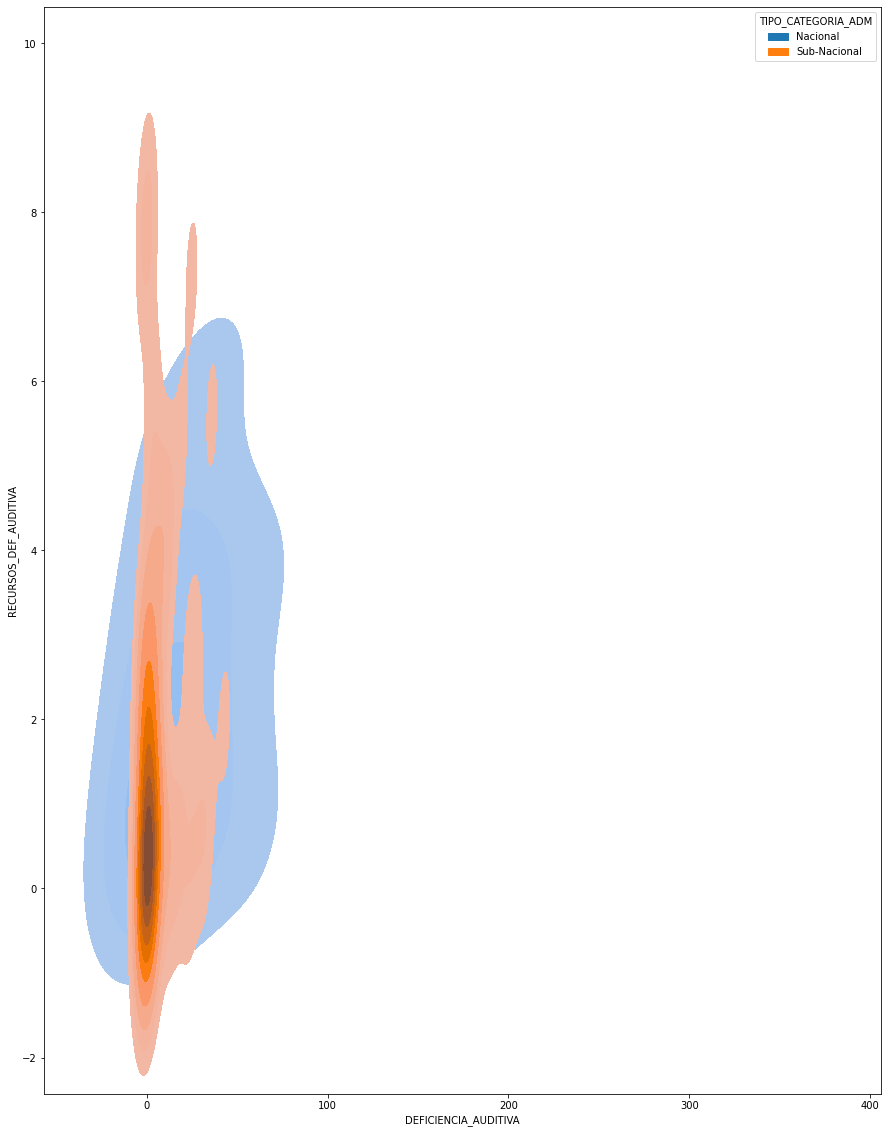

In [6]:
sns.kdeplot(
    data=dataset, 
    x="DEFICIENCIA_AUDITIVA",
    y="RECURSOS_DEF_AUDITIVA", 
    hue="TIPO_CATEGORIA_ADM", 
    fill=True
)

#### 1.1.4 Deficiência Cognitiva X Recursos para Deficiência Cognitiva

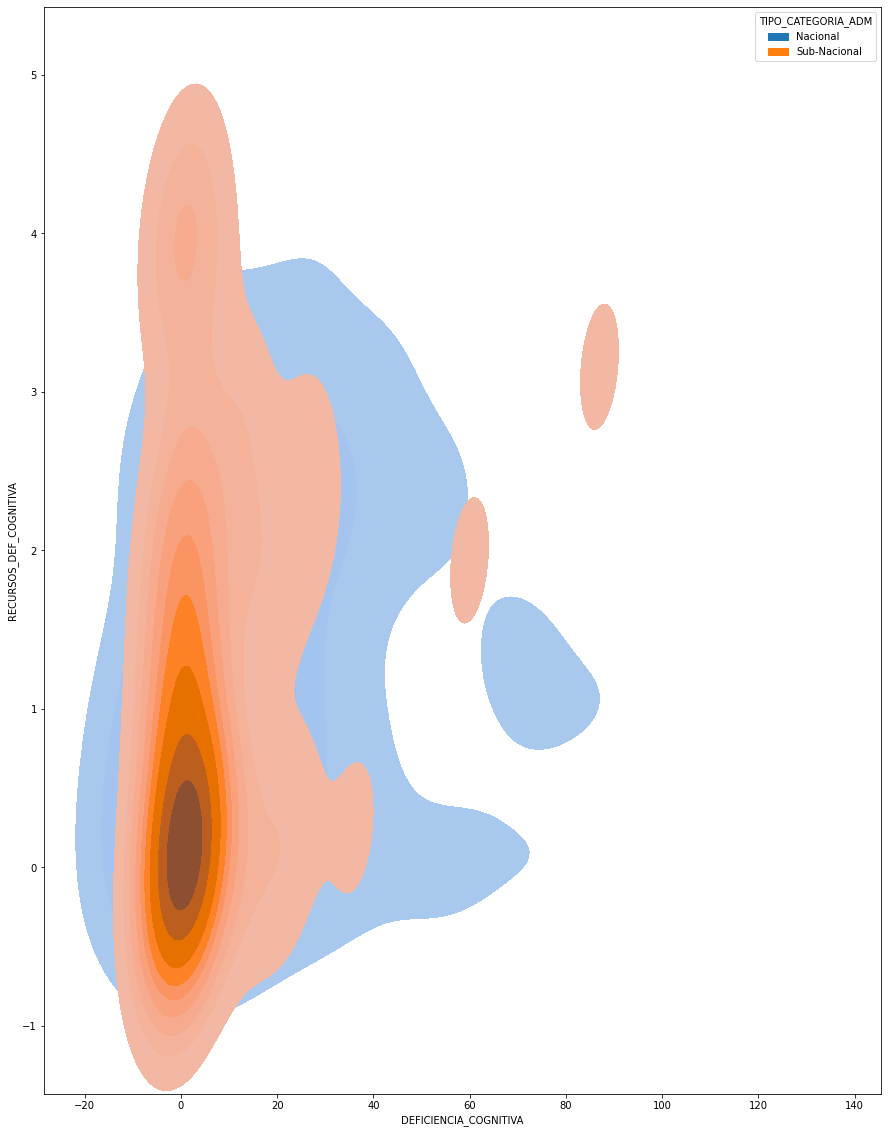

In [7]:
sns.kdeplot(
    data=dataset, 
    x="DEFICIENCIA_COGNITIVA",
    y="RECURSOS_DEF_COGNITIVA", 
    hue="TIPO_CATEGORIA_ADM", 
    fill=True
)

#### 1.1.5 Deficiência Múltipla X Recursos para Deficiência Múltipla

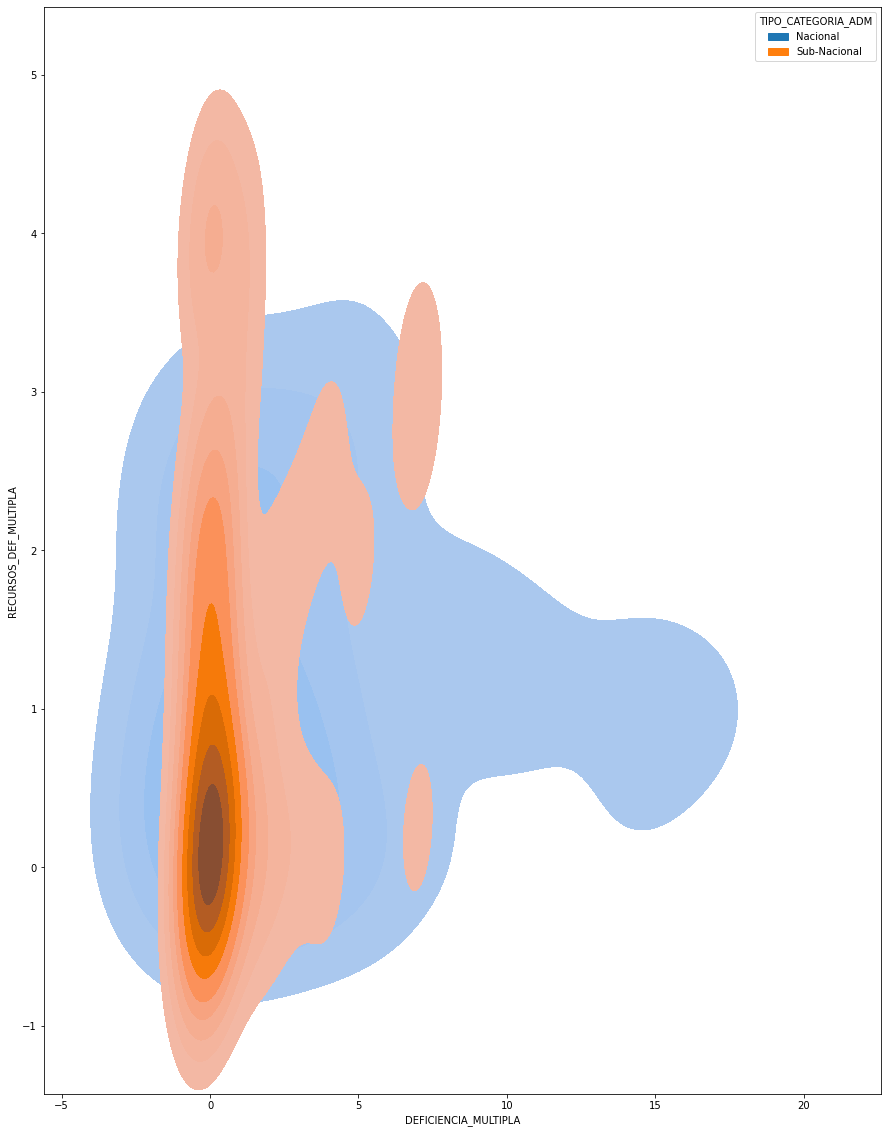

In [8]:
sns.kdeplot(
    data=dataset, 
    x="DEFICIENCIA_MULTIPLA",
    y="RECURSOS_DEF_MULTIPLA", 
    hue="TIPO_CATEGORIA_ADM", 
    fill=True
)


# 2.0 Predição do dataset utilizando KNN

### 2.1 Separando os dados treinamento e teste


In [9]:
X = dataset.drop(columns=[ 
                          "TIPO_CATEGORIA_ADM",
                          "DEFICIENCIA_AUDITIVA",
                          "DEFICIENCIA_MULTIPLA",
                          "RECURSOS_DEF_VISUAL",
                          "RECURSOS_DEF_COGNITIVA",
                          "RECURSOS_DEF_AUDITIVA",
                          "RECURSOS_DEF_MULTIPLA",
                          "REGIAO",
                          "UF"
                          ])
y = dataset["TIPO_CATEGORIA_ADM"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### 2.2 Cria o objeto KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

### 2.3 Validando a acurácia e precisão da predição dos dados

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix:

[[27 17]
 [ 8 42]]

Classification report:

              precision    recall  f1-score   support

    Nacional       0.77      0.61      0.68        44
Sub-Nacional       0.71      0.84      0.77        50

    accuracy                           0.73        94
   macro avg       0.74      0.73      0.73        94
weighted avg       0.74      0.73      0.73        94

Accuracy:  0.7340425531914894


#### 2.3.1 Medido o "score" da predição

In [12]:
knn = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
k = knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)
k_score = k.score(X_test, y_test)
k_score

0.7340425531914894

### 2.4 Procurando o melhor valor para K através da taxa de erro

Text(0, 0.5, 'Erro médio')

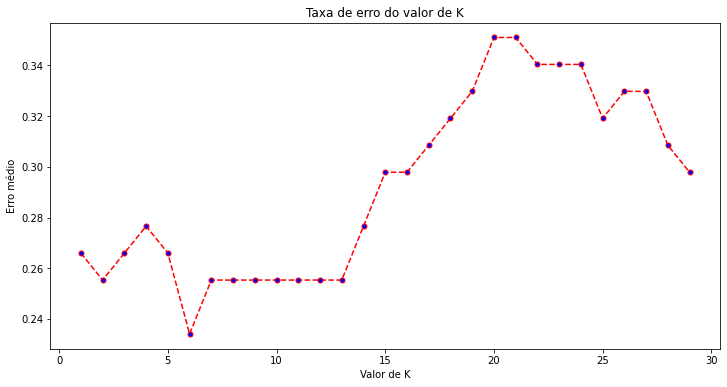

In [13]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Taxa de erro do valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Erro médio')

# 3.0 Visualizando KNN

In [15]:
def knn_comparison(X, y, k):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X, y)
  value=1.5
  width=0.75
# Plotting decision region
  plt.figure(figsize=(10, 8))
  plot_decision_regions(
     X.to_numpy(), 
     y, 
     clf=clf,
     legend=2, 
     feature_index=[1,5], 
     filler_feature_values={0: value, 3: value, 4: value, 5: value, 2: value},  
     filler_feature_ranges={0: width, 3: width, 4: width, 5: width, 2: width}
     )
# Adding axes annotations
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Knn com K=" + str(k))
  plt.show()

for i in [6]:
  knn_comparison(X_train, y_train, i)

ValueError: ignored

<Figure size 720x576 with 0 Axes>